<a href="https://colab.research.google.com/github/Creatrohit9/OLYMPIC-ANALYSIS/blob/main/Olympic_Analysis_by_Rohit_bhadauriya_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Olympic Analysis </u></b>

## <b> Problem Description </b>

### Which Olympic athletes have the most gold medals? Which countries are they from and how has it changed over time?
More than 35,000 medals have been awarded at the Olympics since 1896. The first two Olympiads awarded silver medals and an olive wreath for the winner, and the IOC retrospectively awarded gold, silver, and bronze to athletes based on their rankings.


## <b> Data Description </b>

### <b> The dataset consists of various columns like "Year", "City", "Sport", "Discipline", "Athlete", "Country", "Gender" to name a few.It includes a row for every Olympic athlete that has won a medal since the first games. Data was provided by the IOC Research and Reference Service and published by The Guardian's Datablog.</b>

# **The goal is to turn data into information and information into insight — Carly Fiorina**

#Importing libraries

In [33]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import SVG
from IPython.display import display

# Data Initialization

In [34]:
sum='/content/drive/MyDrive/python pandas data set/summer.csv'
wint='/content/drive/MyDrive/python pandas data set/winter.csv'

In [35]:
dfsum = pd.read_csv(sum, encoding= 'unicode_escape')

In [36]:
dfwint = pd.read_csv(wint, encoding= 'unicode_escape')

#**Exploratory Data Analysis**

### **SUMMER OLYMPIC DATA**

In [37]:
dfsum.shape

(31165, 9)

In [38]:
dfsum.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [39]:
dfsum.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


### **WINTER OLYMPIC DATA**

In [40]:
dfwint.shape

(5770, 9)

In [41]:
dfwint.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, AndrÃ©",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [42]:
dfwint.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold
5769,2014,Sochi,Skiing,Snowboard,"TRESPEUCH, Chloe",FRA,Women,Snowboard Cross,Bronze


## **Statistical analysis**

In [43]:
# dat description for the info
dfsum.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# dat description for the info
dfwint.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,5770.000000,5770,5770,5770,5770,5770,5770,5770,5770
unique,NaN,19,7,15,3761,45,2,83,3
top,NaN,Sochi,Skiing,Ice Hockey,"BJOERNDALEN, Ole Einar",USA,Men,Ice Hockey,Silver
freq,NaN,612,1781,1536,13,653,3944,1536,1930
mean,1986.350433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,24.263673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1924.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1972.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1994.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
dfsum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [46]:
dfwint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


8 catogorical feature and one numerical feature we have for both summer and winter olympic.

No worry about the missing value.

In [47]:
# find Numerical variables
numerical = [var for var in dfsum.columns if dfsum[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 1 numerical variables


In [48]:
# Discrete varaiable
discrete = []
for var in numerical:
    if len(dfsum[var].unique())<20:
        print(var, ' values: ', cred_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

There are 0 discrete variables


In [49]:
# checkng for no null value
dfsum.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [50]:
# checkng for no null value
dfsum.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [51]:
# read the data for the year
dfsum['Year'].value_counts()

2008    2042
2000    2015
2004    1998
2012    1949
1996    1859
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
1920    1298
1972    1185
1968    1031
1964    1010
1952     889
1912     885
1956     885
1924     884
1960     882
1936     875
1948     814
1908     804
1928     710
1932     615
1900     512
1904     470
1896     151
Name: Year, dtype: int64

In [52]:
#creating variable for categorie
categ_features = ['City','Sport','Discipline','Athlete','Country','Gender','Event']
dfsum1=dfsum[categ_features]

In [53]:
display(dfsum['Athlete'].unique())

array(['HAJOS, Alfred', 'HERSCHMANN, Otto', 'DRIVAS, Dimitrios', ...,
       'TOTROV, Rustam', 'ALEKSANYAN, Artur', 'LIDBERG, Jimmy'],
      dtype=object)

In [54]:
display(dfsum['Medal'].unique())

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [55]:
# year mont count from the data set
dfsum1=dfsum.groupby(['Year','Athlete']).agg({'Medal':['sum']}).reset_index()

In [56]:
import plotly.express as px

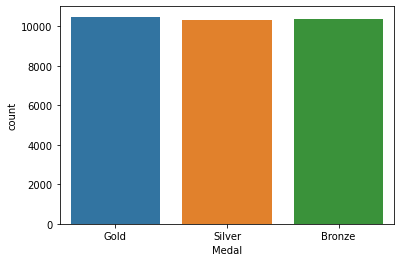

In [57]:
#count plot for diffrent seasons
sns.countplot(x ='Medal', data = dfsum)

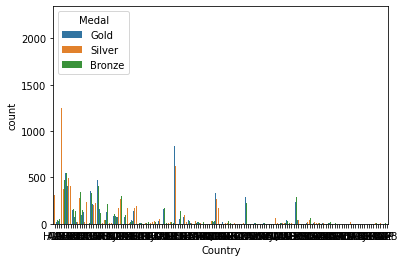

In [60]:
sns.countplot(x ='Country',hue = 'Medal', data = dfsum)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


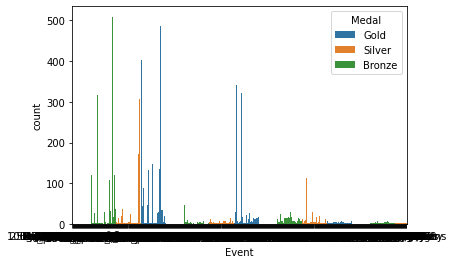

In [62]:
sns.countplot(x ='Event',hue = 'Medal', data = dfsum)